In [56]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.discriminant_analysis import StandardScaler
from sklearn.datasets import make_blobs

# Projet ANDO

## Projection Orthogonale

**Définition** :

Soit $\mathcal{E}$ un espace vecteuriel de dimension $p$. Si $\mathcal{D}$ est une droite vecteurielle engendrée par le vecteur $\vec{a}$ qui passe par un point $Q$ de $\mathbb{R}^p$, l'ensemble des vecteurs orthogonaux à $\mathcal{D}$ est un hyperplan appelé hyperplan normal à $\mathcal{D}$ et défini par : 

$$
\mathcal{D}^{\perp} =  \left\{ \vec{h} \in \mathbb{R}^p \mid (\vec{h}\cdot \vec{a}) = 0 \right\}
$$


Si $x$ est un point arbitraire de $\mathbb{R}^p$ et si on note $\vec{x}$ le vecteur associé qui va de $Q$ à ce point, on peut toujours le décomposer de la façon suivante :

$$
\vec{x} = \vec{x}_{\mathcal{D}} + \vec{x}_{\perp}
\text{ avec }
\vec{x}_{\mathcal{D}} = \frac{(\vec{x} \cdot \vec{a})}{\|a\|^2}\vec{a}
$$

Si on note $x_{\mathcal{D}}$ la projection du point sur la droite $\mathcal{D}$ et si on note $x_i$ la ième composante du point $x$, on obtient alors les coordonnées du point $x_{\mathcal{D}}$:

$$
\forall i \in [1;p], x_{\mathcal{D}_i} =  Q_{i} + \frac{\sum_{k=1}^{p} (x_{k} - Q_{k}) * a_{k}}{\|a\|^2} * a_{i}
$$

Pour avoir la distance entre le point $x$ et la droite $\mathcal{D}$, on a besoin de:

$$
\|\vec{x}_{\perp} \| = \|(x_1 - x_{\mathcal{D}_1},\  x_2 - x_{\mathcal{D}_2}, \ ..., \ x_p - x_{\mathcal{D}_p}) \|
$$

Dans la suite de ce document, on choisira de représenter une droite dans $\mathbb{R}^p$ par un de ses vecteurs directeurs unitaires, noté $\vec{u}$.

In [17]:
# Fonction pour la projection orthogonale d'un point sur une droite
# x: point à projeter
# u: vecteur directeur unitaire de la droite
# q: point de la droite
# retourne la projection orthogonale de x sur la droite
def projection_orthogonale(x, u, q):
    return np.dot(x - q, u) * u + q

# Fonction pour calculer la distance entre un point et sa projection orthogonale sur une droite
# x: un point de l'espace
# u: vecteur directeur unitaire de la droite
# q: point de la droite
# retourne la distance entre x et sa projection orthogonale sur la droite
def distance_projection(x, u, q):
    projection = projection_orthogonale(x, u, q)
    return np.linalg.norm(x - projection)

In [18]:
class Point():
    def __init__(self, coordonnées: np.array):
        self.coordonnées = coordonnées

    def __repr__(self):
        return f"Point({self.coordonnées})"
    
    def dim(self):
        return self.coordonnées.shape[0]
    
class Droite():
    def __init__(self, point: Point, vecteur: np.array):
        if (point.dim() != vecteur.shape[0]):
            raise Exception("Le vecteur doit avoir la même dimension que le point", point.dim(), vecteur.shape[0])
        self.point = point
        self.vecteur = vecteur/np.linalg.norm(vecteur)

    def __repr__(self):
        return f"Droite(Passe par le point {self.point}, vecteur directeur {self.vecteur})"

    def projection_orthogonale(self, point: Point):
        if (point.dim() != self.vecteur.shape[0]):
           raise Exception("Le point doit avoir la même dimension que le vecteur directeur,", point.dim(), self.vecteur.shape[0])
        return projection_orthogonale(point.coordonnées, self.vecteur, self.point.coordonnées)

    def distance_projection(self, point: Point):
        if (point.dim() != self.vecteur.shape[0]):
            raise Exception("Le point doit avoir la même dimension que le vecteur directeur,", point.dim(), self.vecteur.shape[0])
        return distance_projection(point.coordonnées, self.vecteur, self.point.coordonnées)
    
    def afficher(self, ax):
        # Définir deux points pour tracer la droite
        point1 = self.point.coordonnées
        point2 = self.point.coordonnées + self.vecteur

        # Tracer la droite
        ax.plot([point1[0], point2[0]], [point1[1], point2[1]], label=f"Droite {self.point} - {point2}")
    

In [19]:
# Fonction pour afficher la projection orthogonale d'un point sur une droite
# x: point à projeter
# droite: droite de la projection 
def plot_projection_distance(x: Point, D: Droite):
    # Calculer la projection orthogonale
    projection = D.projection_orthogonale(x)
    
    # Créer un vecteur pour représenter la droite
    t = np.linspace(0, 5, 100)
    line = np.outer(t, D.vecteur) + D.point.coordonnées
    
    # Créer le graphique
    plt.figure(figsize=(8, 8))
    
    # Tracer la droite
    plt.plot(line[:, 0], line[:, 1], label='Droite D')
    
    # Tracer le point x
    plt.scatter(x.coordonnées[0], x.coordonnées[1], color='red', label='Point x')
    
    # Tracer la projection orthogonale
    plt.scatter(projection[0], projection[1], color='green', label='Projection orthogonale')
    
    # Tracer la ligne de distance
    plt.plot([x.coordonnées[0], projection[0]], [x.coordonnées[1], projection[1]], linestyle='--', color='blue', label='Distance')
    
    # Ajouter des étiquettes et une légende
    plt.text(x.coordonnées[0] + 0.2, x.coordonnées[1] + 0.2, 'point x', color='red')
    plt.text(projection[0] + 0.2, projection[1] - 0.2, 'Projection', color='green')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.axis('equal')
    plt.title('Projection orthogonale et distance entre un point et une droite')
    
    # Afficher le graphique
    plt.show()

#nbconvert

Coordonnées de la projection orthogonale: [-0.79802776  1.63075237]
Distance entre le point et la droite: 3.1150920360380336


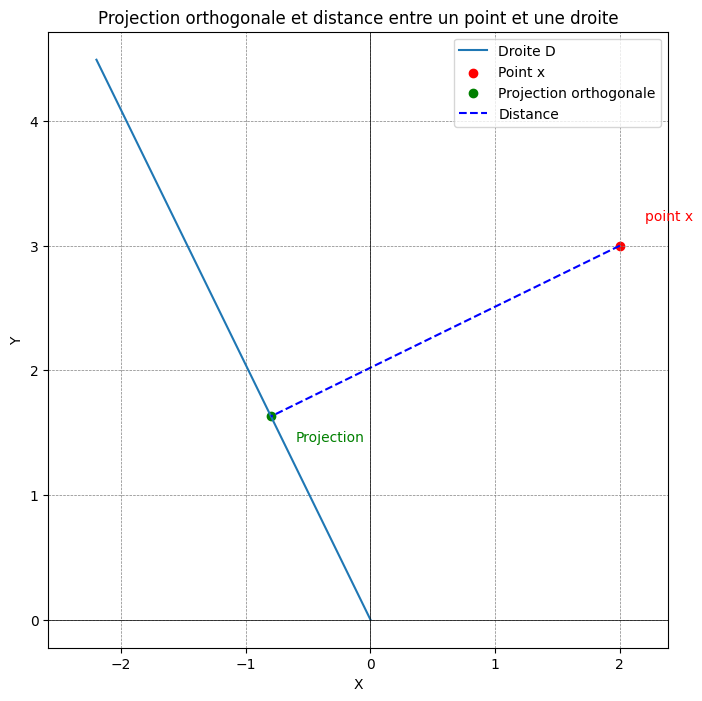

In [21]:
# Test de la fonction de projection orthogonale
x = Point(np.array([2, 3]))
D = Droite(Point(np.array([0,0])), np.array([-2.3, 4.7]))


# Calculer la projection orthogonale
projection = D.projection_orthogonale(x)
print("Coordonnées de la projection orthogonale:", projection)

# Calculer la distance entre le point et la droite
distance = D.distance_projection(x)
print("Distance entre le point et la droite:", distance)
plot_projection_distance(x, D)

In [22]:
# Fonction pour calculer la droite la plus proche d'un point
# x: un point de l'espace
# droites: un tableau de droites
# retourne le vecteur directeur de la droite la plus proche de x
def droite_plus_proche(x, droites):
    distances = [d.distance_projection(x) for d in droites]
    
    # Trouver l'indice de la droite la plus proche
    indice_plus_proche = np.argmin(distances)
    
    # Vérifier s'il y a des égalités de distance
    indices_egalite = np.where(distances == distances[indice_plus_proche])[0]
    
    # S'il y a des égalités, choisir aléatoirement parmi les droites équidistantes
    if len(indices_egalite) > 1:
        indice_plus_proche = np.random.choice(indices_egalite)
    
    return droites[indice_plus_proche], "Indice de la liste: {}".format(indice_plus_proche)



# Les nuées dynamiques ou les kmeans généralisés

In [218]:
# Créer un ensemble de droites représentant les K classes initiales
def initialiser_representants(K, points):
    dimension = points[0].dim()
    N = len(points)
    ind = random.sample(range(N), K)
    representants = np.array([])
    for k in range(K):
        representants = np.append(representants, Droite(points[ind[k]], np.random.randn(dimension))) 
    return representants

# on veut uniquement les vecteurs propres de la matrice de covariance
def comp_acp(X):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvecteurs = np.linalg.eigh(cov_matrix)
    # On trie les vecteurs propres par ordre décroissant des valeurs propres
    indices = np.argsort(eigenvalues)[::-1]
    eigenvecteurs = eigenvecteurs[:, indices]
    return eigenvecteurs


def kmeans_generalises(points, K, max_iterations=1000):
    # Initialisation des représentants (droites)
    representants = initialiser_representants(K, points)

    # Initialisation des classes précédentes
    prev_classes = np.zeros(len(points), dtype=int)

    for iteration in range(max_iterations):
        # Affectation des points aux classes
        distances = np.array([[representant.distance_projection(point) for representant in representants] for point in points]) # Matrice de distances de dimension (N, K)
        classes = np.argmin(distances, axis=1)  # Vecteur de classes de dimension (N,)

        # Vérifier si les classes ont convergé
        if np.array_equal(classes, prev_classes):
            print(f"Convergence atteinte à l'itération {iteration + 1}")
            break  # Arrêter l'algorithme

        prev_classes = np.copy(classes)  # Mettre à jour les classes précédentes

        # Mise à jour des représentants
        for k in range(K):
            ind_k = np.where(classes == k)[0]
            X_k = np.array([points[i].coordonnées for i in ind_k]) # Sous matrice des points de la classe k
            # Si la classe pssède au moins 2 points
            if X_k.shape[0] > 1:
                acp_k = comp_acp(X_k)
                representants[k] = Droite(Point(np.mean(X_k, axis=0)), acp_k[0])
            # Sinon on garde le même représentant

    return representants, classes

In [216]:
def kmeans_generalises(points, K, max_iterations=1000):
    # Initialisation des représentants (droites)
    representants = initialiser_representants(K, points)

    # Initialisation des classes précédentes
    prev_classes = np.zeros(len(points), dtype=int)
    distances = np.array([[representant.distance_projection(point) for representant in representants] for point in points]) # Matrice de distances de dimension (N, K)
    classes = np.argmin(distances, axis=1)  # Vecteur de classes de dimension (N,)
    
    iteration = 0
    while (np.any(prev_classes != classes)):
        iteration += 1
        
        prev_classes = np.copy(classes)  # Mettre à jour les classes précédentes

        # Mise à jour des représentants
        for k in range(K):
            ind_k = np.where(classes == k)[0]
            X_k = np.array([points[i].coordonnées for i in ind_k]) # Sous matrice des points de la classe k
            # Si la classe pssède au moins 2 points
            if X_k.shape[0] > 1:
                acp_k = comp_acp(X_k)
                representants[k] = Droite(Point(np.mean(X_k, axis=0)), acp_k[0])
            # Sinon on garde le même représentant
        
        distances = np.array([[representant.distance_projection(point) for representant in representants] for point in points]) # Matrice de distances de dimension (N, K)
        classes = np.argmin(distances, axis=1)

    return representants, classes

# Exemples test

In [217]:
# Définir trois droites
def droite1(x):
    return -5

def droite2(x):
    return 0

def droite3(x):
    return 5

# Points autour de la première droite
X1, _ = make_blobs(n_samples=100, centers=[[i, droite1(i) + np.random.normal(0, 0.5)] for i in range(20)])

# Points autour de la deuxième droite
X2, _ = make_blobs(n_samples=100, centers=[[i, droite2(i) + np.random.normal(0, 0.5)] for i in range(-30, -10)])

# Points autour de la troisième droite
X3, _ = make_blobs(n_samples=100, centers=[[i, droite3(i) + np.random.normal(0, 0.5)] for i in range(20, 40)])

# Concaténer les points pour former un ensemble de données
data = np.concatenate([X1, X2, X3])

# Normaliser les données
data_normalized = StandardScaler().fit_transform(data)

# Appliquer l'algorithme des k-means généralisés
K = 3
representants, classes = kmeans_generalises([Point(coord) for coord in data], K, max_iterations=5000)

# Afficher les résultats
for i in range(K):
    print(f"Classe {i + 1} - Représentant : {representants[i]}")

# Afficher les points en couleur en fonction des classes
for k in range(K):
    ind_k = np.where(classes == k)[0]
    points_k = data[ind_k]
    plt.scatter(points_k[:, 0], points_k[:, 1], label=f'Classe {k + 1}')

# Afficher les droites des représentants
for i in range(K):
    droite = representants[i]

    # Tracer la droite
    direction = droite.vecteur
    origin = droite.point.coordonnées
    scale = 3
    end_point = origin + scale * direction
    plt.plot([origin[0], end_point[0]], [origin[1], end_point[1]], color='black')

x_values = np.arange(20)
plt.plot(x_values, [droite1(i) for i in x_values], color='red', linestyle='dashed', label='Droite 1 réelle')
plt.plot(x_values, [droite2(i) for i in x_values], color='green', linestyle='dashed', label='Droite 2 réelle')
plt.plot(x_values, [droite3(i) for i in x_values], color='blue', linestyle='dashed', label='Droite 3 réelle')

plt.title('K-means généralisés')
plt.show()

KeyboardInterrupt: 

# Application au dataset iris

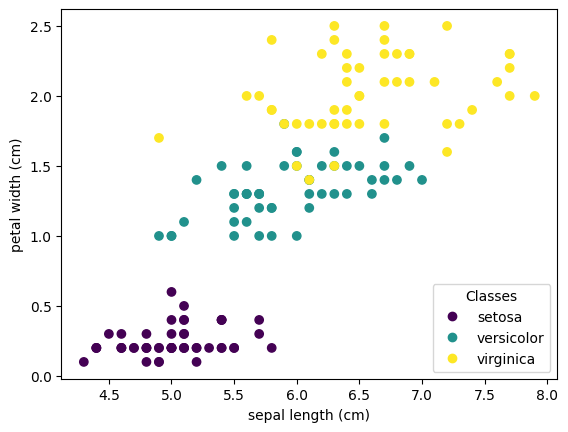

In [163]:
from sklearn.datasets import load_iris

# Charger le jeu de données Iris
iris = load_iris()
data = iris.data

# On plot les points seulement en 2D
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[3])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

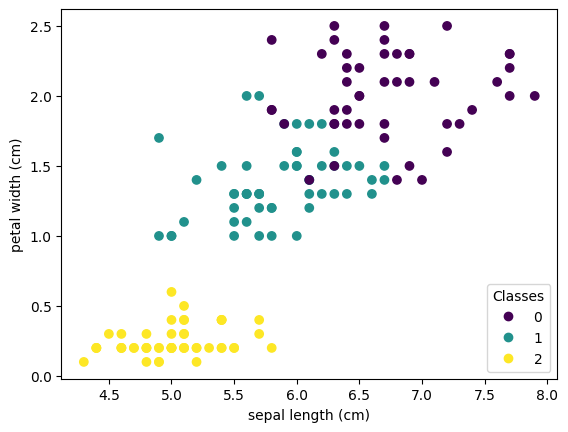

In [188]:
# Appliquer l'algorithme des k-means généralisés
K = 3  # Nombre de classes
representants, classes = kmeans_generalises([Point(x) for x in data], K)

# Afficher les points en couleur en fonction de leurs clusters
_, ax = plt.subplots()
scatter = ax.scatter(data[:, 0], data[:, 3], c=classes, cmap='viridis')
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[3])
_ = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")

plt.show()

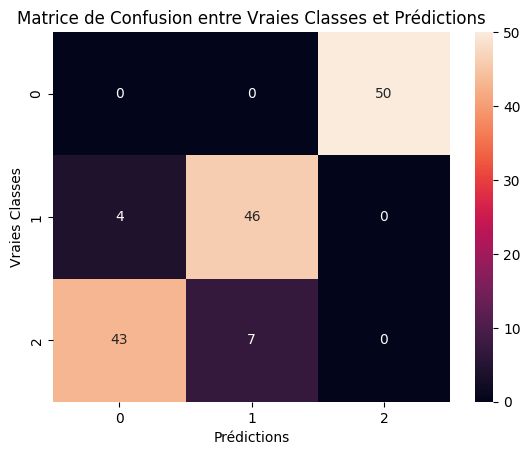

In [189]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
matrice_confusion = confusion_matrix(iris.target, classes)

# Afficher la matrice de confusion avec un heatmap
sns.heatmap(matrice_confusion, annot=True, fmt="d")
plt.title('Matrice de Confusion entre Vraies Classes et Prédictions')
plt.xlabel('Prédictions')
plt.ylabel('Vraies Classes')
plt.show()


In [52]:
def generer_nuage_points_droite(droite, num_points=50, scale=1):
    return np.array([Point(droite.point.coordonnées + np.random.normal(scale=scale, size=droite.point.dim()) + droite.vecteur) for _ in range(num_points)])

In [55]:
# Exemple
d1 = Droite(Point(np.random.randn(2)), np.random.randn(2))
d2 = Droite(Point(np.random.randn(2)), np.random.randn(2))

# Générer des points autour des droites 
points_d1 = generer_nuage_points_droite(d1)
points_d2 = generer_nuage_points_droite(d2)
# Concaténer les points
points = np.concatenate((points_d1, points_d2))
# Afficher les points


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Convergence atteinte à l'itération 8


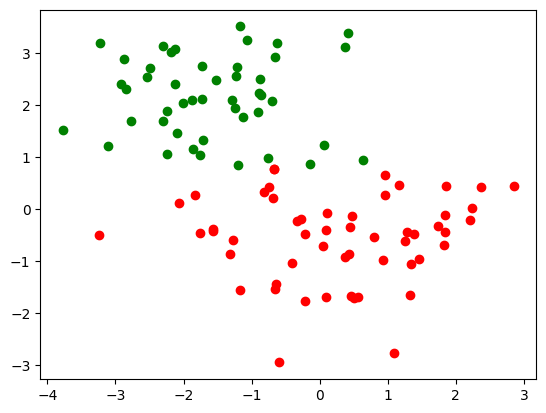

In [54]:
# Appliquer l'algorithme des k-means généralisés
K = 2  # Nombre de classes
representants, classes = kmeans_generalises(points, K)

# Créer un tableau de couleurs pour les classes
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Afficher les points en couleur en fonction des classes
for k in range(K):
    ind_k = np.where(classes == k)[0]
    points_k = np.array([point.coordonnées for i, point in enumerate(points) if i in ind_k])
    plt.scatter(points_k[:, 0], points_k[:, 1], c=colors[k], label=f'Classe {k + 1}')

Classe 1 - Représentant : Droite(Passe par le point Point([-5.92058402e-02 -4.35012812e-05]), vecteur directeur [ 0.05137873 -0.99867924])
Classe 2 - Représentant : Droite(Passe par le point Point([-0.63929797  0.1128646 ]), vecteur directeur [-0.9995359   0.03046281])
Classe 3 - Représentant : Droite(Passe par le point Point([ 1.14897269 -0.19182414]), vecteur directeur [-0.00128639 -0.99999917])


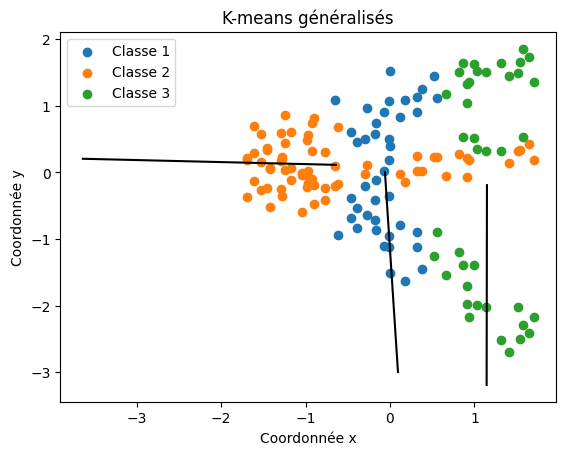

In [ ]:
data = [Point(np.random.randn(2)) for _ in range(5)]
acp = comp_acp(np.array([point.coordonnées for point in data]))
print(acp)

[[-0.8374421   0.54652606]
 [-0.54652606 -0.8374421 ]]


In [ ]:
point = Point(np.array([2., 3.]))
print(point)

Point([2. 3.])


AttributeError: 'Point' object has no attribute 'coordonnees'

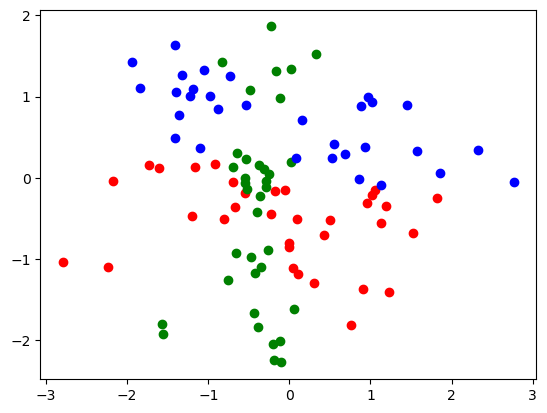

In [ ]:
# Créer un ensemble de droites représentant les K classes initiales
def initialiser_representants(K, points):
    dimension = points[0].dim()
    N = len(points)
    ind = random.sample(range(N), K)
    representants = np.array([])
    for k in range(K):
        representants = np.append(representants, Droite(points[ind[k]], np.random.randn(dimension))) 
    return representants


# Fonction pour appliquer l'algorithme des k-means généralisés
def kmeans_generalises(points, K, max_iterations=100):
    N, dimension = len(points), points[0].dim()

    # Initialisation des représentants (droites)
    representants = initialiser_representants(K, points)

    for iteration in range(max_iterations):
        # Affectation des points aux classes
        
        distances = np.array([[representant.distance_projection(point) for representant in representants] for point in points]) # Taille : N x K
        classes = np.argmin(distances, axis=1) # Pour chaque point, on prend l'indice de la classe la plus proche

        # Mise à jour des représentants
        for k in range(K):
            # Sélectionner les points de la classe k
            points_in_class = [points[i] for i in range(N) if classes[i] == k]
            print(points_in_class)
            # Calculer le nouveau représentant
            coord = np.mean([point.coordonnées for point in points_in_class], axis=0)
            point_k = Point(coord)
            print(point_k)
            if (len(points_in_class) > 1):
                u_k = sum( (xi.coordonnées - point_k.coordonnées) / np.linalg.norm (xi.coordonnées - point_k.coordonnées) for xi in points_in_class) / len(points_in_class)
                representants[k] = Droite(point_k, u_k)
            else:
                representants[k] = Droite(point_k, np.random.randn(dimension))

            # point_k = Point(np.mean([point.coordonnées for point in points_in_class], axis=0))
            # ind_min, dist_min = (0, 0)
            # # for r in range(0, 1800):
            # #     droite_k = Droite(point_k, np.array([np.cos(r*np.pi/1800), np.sin(r*np.pi/1800)]))
            # #     sum_dist = np.sum([droite_k.distance_projection(point) for point in points_in_class])
            # #     if (sum_dist < dist_min):
            # #         ind_min, dist_min = (r, sum_dist)
            # # representants[k] = Droite(point_k, np.array([np.cos(ind_min*np.pi/1800), np.sin(ind_min*np.pi/1800)]))

    # Retourner les classes et les représentants finaux
    return classes, representants

# Exemple d'utilisation
np.random.seed(123)
# Génération de données aléatoires bidimensionnelles
data = [Point(np.random.randn(2)) for _ in range(5)]

# Appliquer l'algorithme des k-means généralisés
K = 3  # Nombre de classes
classes, representants = kmeans_generalises(data, K)

# Afficher les résultats
for i in range(K):
    print(f"Classe {i + 1} - Représentant : {representants[i]}")
    print(f"Points dans la classe : {[data[j] for j in range(len(data)) if classes[j] == i]}\n")

In [ ]:
data = [Point(*np.random.randn(2)) for _ in range(10)]
print(data)

initialiser_representants(3, data)

[Point(2.392365265937726, 0.4129121603087788), Point(0.9787360059373466, 2.2381433384979528), Point(-1.2940853231612488, -1.0387882102049535), Point(1.7437122251229307, -0.7980627352410625), Point(0.02968323030333022, 1.0693159694243486), Point(0.8907063912931708, 1.7548861819811095), Point(1.4956441370334692, 1.0693926697057368), Point(-0.7727087142471915, 0.7948626677932181), Point(0.31427199450686705, -1.326265459940456), Point(1.4172990464768525, 0.8072365345785665)]


[Droite(Passe par le point Point(-1.2940853231612488, -1.0387882102049535), vecteur directeur [ 0.19154566 -0.9814837 ]),
 Droite(Passe par le point Point(0.31427199450686705, -1.326265459940456), vecteur directeur [-0.98641965  0.16424458]),
 Droite(Passe par le point Point(0.31427199450686705, -1.326265459940456), vecteur directeur [ 0.49098916 -0.87116568])]

In [ ]:
p = Point(np.array([2, 3]))
type(p.coordonnées.shape[0])

int

## EM Algorithm (2023)

On applique l'algorithme EM sur une mixture unidimensionnelle de 2 Gaussiennes, avec pour moyennes, variances et proportions respectives:  $\mu_1 = 0$, $\mu_2 = 4$, $\sigma_1 = 1$, $\sigma_2 = 1/2$ ...

On note $D(x, \mu, \sigma)$ la distribution.

### Initialisation of the EM algorithm

Arbitrairement, on pose 0, 0, 1, 1, 0,5.
Soient $X = (x_1, x_2, ..., x_n)$ un échantillon des distributions mentionnées. On considère $\forall i \in [1, n], \forall k \in [1, 2], z_{ik}$ la variable latente binaire associé à la composante $x_i$ et qui indique si $x_i$ provient de la distribution $k$.
$\forall i \in [1, n], \forall k \in [1, 2], t_{ik} = \mathbb{P}(z_{ik} = 1 | X_i = x_i) $

On note l'indice ($q$), qui indique la $q^{ème}$ de l'itération.

## E-step

On a $\forall i \in [1, n], t_{i, 1}^{(0)} = \frac{\pi_1^{(0)} * D(x_i, \mu_1, \sigma_1)}{\pi_1^{(0)} * D(x_i, \mu_1, \sigma_1) + (1 - \pi_1^{(0)}) * D(x_i, \mu_2, \sigma_2)} $


In [ ]:
class Gaussian():
    def __init__(self, mu, sigma2):
        self.mu = mu
        self.sigma2 = sigma2

    def __repr__(self):
        return f"Gaussian(µ={self.mu}, σ²={self.sigma2})"

    def pdf(self, x):
        return (1 / (self.sigma2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - self.mu) / self.sigma2) ** 2)

    def plot_pdf(self, x_min, x_max):
        x = np.linspace(x_min, x_max, 100)
        y = self.pdf(x)
        plt.plot(x, y, label=self.__repr__())
        plt.grid()
        plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
mu1 = 0
mu2 = 4
sigma1 = 1
sigma2 = 1/2
pi1 = 1/3
n = 1000

Z = np.zeros(n)
mixture = np.zeros(n)

for k in range(0, n):
    tmp = np.random.choice([1, 2], p=[pi1, 1 - pi1])
    Z[k] = tmp
    if tmp == 1:
        mixture[k] = np.random.normal(mu1, sigma1)
    else:
        mixture[k] = np.random.normal(mu2, sigma2)

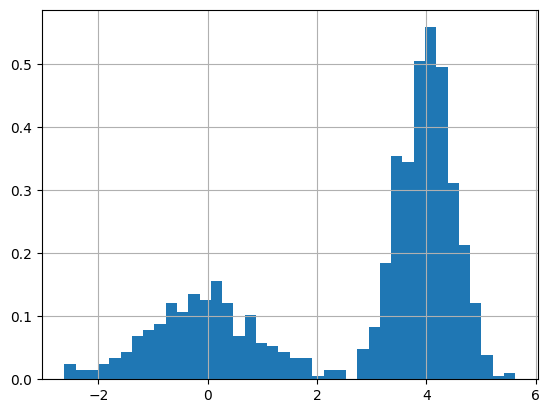

In [ ]:
plt.grid()
plt.hist(mixture, bins=40, density=True)
plt.show()


# Initialisation

In [ ]:
n = 1000
mu1_list = np.array([0])
mu2_list = np.array([10])
sigma1_list = np.array([5])
sigma2_list = np.array([1])
pi1_list = np.array([0.5])
ti1_list = np.array([0] * n)
Q = np.array([])

criteria = 10**(-6)

# E Step

In [ ]:
def Gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def EM(mu1_list, mu2_list, sigma1_list, sigma2_list, pi1_list, Q, mixture):
    
    # E-step
    tmp = Gaussian(mixture, mu1_list[-1], sigma1_list[-1])
    ti1_list = pi1_list[-1] * tmp / (pi1_list[-1] * tmp + (1 - pi1_list[-1]) * Gaussian(mixture, mu2_list[-1], sigma2_list[-1]))
    Q = np.append(Q, np.sum( ti1_list * np.log(pi1_list[-1] * Gaussian(mixture, mu1_list[-1], sigma2_list[-1])) + (1 - ti1_list) * np.log((1 - pi1_list[-1]) * Gaussian(mixture, mu2_list[-1], sigma2_list[-1]))))
    
    # M-step
    if (len(Q) == 1 or (np.linalg.norm(np.array([mu1_list[-1], mu2_list[-1], sigma1_list[-1], sigma2_list[-1], pi1_list[-1]]) - np.array([mu1_list[-2], mu2_list[-2], sigma1_list[-2], sigma2_list[-2], pi1_list[-2]])) ** 2 / np.linalg.norm(np.array([mu1_list[-2], mu2_list[-2], sigma1_list[-2], sigma2_list[-2], pi1_list[-2]])) ** 2) > criteria):
        mu1_list = np.append(mu1_list, np.sum(ti1_list * mixture) / np.sum(ti1_list))
        mu2_list = np.append(mu2_list, np.sum((1 - ti1_list) * mixture) / np.sum(1 - ti1_list))
        sigma1_list = np.append(sigma1_list, np.sqrt(np.sum(ti1_list * (mixture - mu1_list[-1]) ** 2) / np.sum(ti1_list)))
        sigma2_list = np.append(sigma2_list, np.sqrt(np.sum((1 - ti1_list) * (mixture - mu2_list[-1]) ** 2) / np.sum(1 - ti1_list)))
        pi1_list = np.append(pi1_list, np.sum(ti1_list) / n)
        return EM(mu1_list, mu2_list, sigma1_list, sigma2_list, pi1_list, Q, mixture)
    else:
        return mu1_list[-1], mu2_list[-1], sigma1_list[-1], sigma2_list[-1], pi1_list[-1]
        

In [ ]:
EM = EM(mu1_list, mu2_list, sigma1_list, sigma2_list, pi1_list, Q, mixture)
print("Il y a convergence: mu1 = {}, mu2 = {}, sigma1 = {}, sigma2 = {}, pi1 = {}".format(EM[0], EM[1], EM[2], EM[3], EM[4]))

TypeError: 'tuple' object is not callable